In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from sgte.handler import SGTEHandler
from thermoclassifier.dataset.encoding import Encoder

In [2]:
sgte = SGTEHandler('Fe')

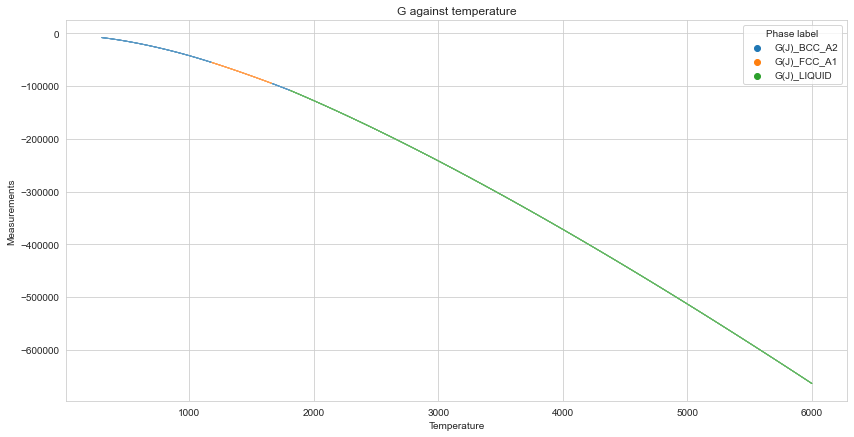

In [3]:
sgte.get_stable_properties(300, 6000, 1e5, measurement='G', add_phase_labels=True, plot=True)
sgte.measurements.set_index('Temperature', inplace=True)

In [9]:
sgte = SGTEHandler('Cu')

Please select the phases you want to evaluate!
Possible phases: 
FCC_A1
LIQUID
BCC_A2
HCP_A3
HCP_ZN

Enter a phases you want to evaluate. Example: BCC_A2
To select all phases, enter: all
If done, press Enter
Enter phase: all



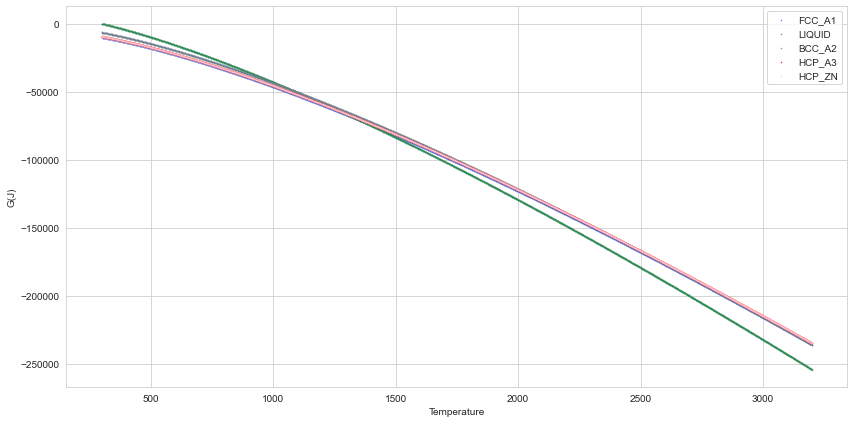

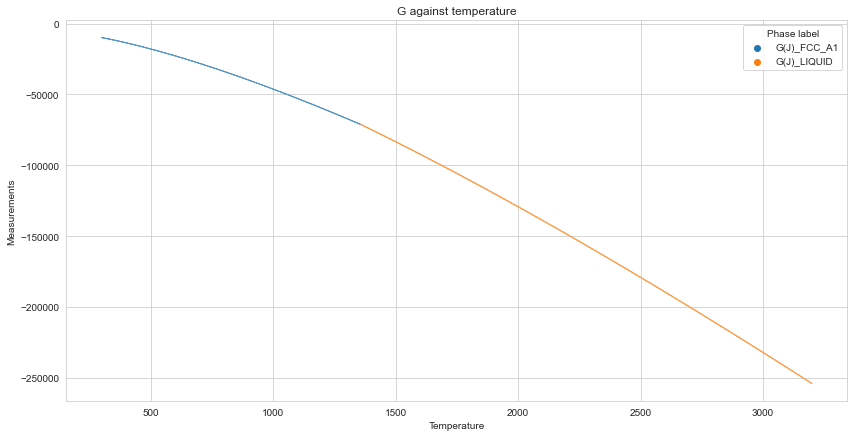

In [10]:
sgte.evaluate_equations(200, 6000, 1e5)
sgte.get_stable_properties(200, 6000, 1e5, measurement='G', add_phase_labels=True, plot=True)